In [5]:
import csv
import pandas as pd
import matplotlib.pyplot as plt

#########################   USER INPUTS  ##########################

#font
font = {'fontname':'Century Gothic'}

#team colors
home_color = 'blue'
away_color = 'yellow'
goal_color = 'red'

###################################################################
zo=12
#read the csv into a data frame (make sure the csv is in the same directory as the python file or put the correct path to the file)
df = pd.read_csv('UDvCCevents.csv', header=0)

#assign columns to variables
home_away = df['teamFor'].values.tolist()
xg = df['xG'].values.tolist()
outcome = df['outcome'].values.tolist()
minute = df['min'].values.tolist()
sec = df['sec'].values.tolist()
situation = df['situation'].values.tolist()
home = df['home'][0]
away = df['away'][0]

#Home values
Hxg = []
Hscore = 0
Hpenalties = 0
Hmin = []
Hsec = []

#Away values 
Axg = []
Ascore = 0
Apenalties = 0
Amin = []
Asec = []

#populate lists
count = 0
for value in home_away:
    if value == 'home':
        if situation[count] == 'Penalty':
            Hpenalties += 1
            Hscore += 1
            continue
        Hxg.append(xg[count])
        Hmin.append(minute[count])
        Hsec.append(sec[count])
        if outcome[count] == 'Goal':
            Hscore += 1
    else:
        if situation[count] == 'Penalty':
            Apenalties += 1
            Ascore += 1
            continue
        Axg.append(xg[count])
        Amin.append(minute[count])
        Asec.append(sec[count])
        if outcome[count] == 'Goal':
            Ascore += 1
    count += 1
    

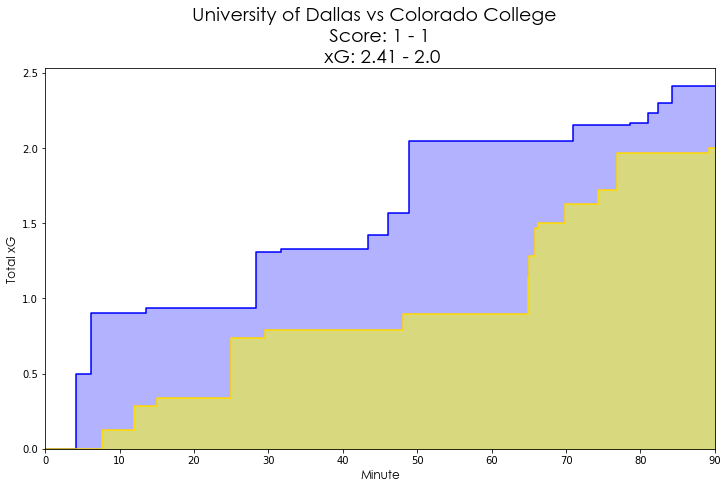

In [7]:
#convert seconds into minutes
home_sec = [i/60 for i in Hsec]
away_sec = [i/60 for i in Asec]

#time values for plotting
home_time = [0]
away_time = [0]

#adding minutes + seconds to get a single time corresponding to each shot
count = 0
for value in home_sec:
    home_time.append(value + Hmin[count])
    count += 1
count = 0
for value in away_sec:
    away_time.append(value + Amin[count])
    count += 1

#calculate cumulative xG values for plotting
home_xg = [0]
away_xg = [0]
hxg_total = 0
axg_total = 0

for value in Hxg:
    hxg_total = value + hxg_total
    home_xg.append(hxg_total)
for value in Axg:
    axg_total = value + axg_total
    away_xg.append(axg_total)

#getting the xG plot to extend to 90th min
home_xg.append(hxg_total)
away_xg.append(axg_total)
home_time.append(90)
away_time.append(90)

plt.fill_between(home_time, home_xg, step='post',color = home_color,alpha=0.3)
plt.step(home_time, home_xg, where='post',color = home_color)
plt.plot(home_time, home_xg, alpha = 0)

plt.fill_between(away_time, away_xg, step='post',color = away_color,alpha=0.5)
plt.step(away_time, away_xg, where='post', color = 'gold')
plt.plot(away_time, away_xg, alpha = 0)

plt.title(f'{home} vs {away} \n Score: {Hscore} - {Ascore} \n xG: {round(sum(Hxg),2)} - {round(sum(Axg),2)}',**font,fontsize=19)
plt.ylabel('Total xG',**font,fontsize=12)
plt.xlabel('Minute',**font,fontsize=12)
plt.xlim(right=90)
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.rcParams['figure.figsize'] = [12, 7]
plt.show()